In [2]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn import datasets
# from sklearn import cross_validation

In [4]:
# X,y = datasets.make_circles()
df = pd.read_csv("datasets/haberman.csv")
df.head(2)

,age,op_year,lymph_nodes,survival
0,30,64,1,1
1,30,62,3,1


In [9]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

### Simple Cross Validation

In [10]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

# split training dataset into cross_validation_train/test
X_tr, X_cv, y_tr, y_cv = train_test_split(X_train,y_train,test_size=0.3)


### CV Accuracies

In [11]:
for i in range(1,30,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_tr,y_tr)
    pred = knn.predict(X_cv)
    
    acc = accuracy_score(y_cv,pred,normalize=True) * float(100)
    print("CV Accuracy for k= %d is %d %%" % (i,acc))

CV Accuracy for k= 1 is 70 %
CV Accuracy for k= 3 is 72 %
CV Accuracy for k= 5 is 75 %
CV Accuracy for k= 7 is 76 %
CV Accuracy for k= 9 is 73 %
CV Accuracy for k= 11 is 72 %
CV Accuracy for k= 13 is 73 %
CV Accuracy for k= 15 is 75 %
CV Accuracy for k= 17 is 75 %
CV Accuracy for k= 19 is 76 %
CV Accuracy for k= 21 is 75 %
CV Accuracy for k= 23 is 78 %
CV Accuracy for k= 25 is 76 %
CV Accuracy for k= 27 is 75 %
CV Accuracy for k= 29 is 75 %


### Test Accuracies

In [12]:
for i in range(1,30,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_tr,y_tr)
    pred = knn.predict(X_test)
    
    acc = accuracy_score(y_test,pred,normalize=True) * float(100)
    print("Test Accuracy for k= %d is %d %%" % (i,acc))

Test Accuracy for k= 1 is 73 %
Test Accuracy for k= 3 is 72 %
Test Accuracy for k= 5 is 75 %
Test Accuracy for k= 7 is 77 %
Test Accuracy for k= 9 is 78 %
Test Accuracy for k= 11 is 76 %
Test Accuracy for k= 13 is 76 %
Test Accuracy for k= 15 is 77 %
Test Accuracy for k= 17 is 79 %
Test Accuracy for k= 19 is 80 %
Test Accuracy for k= 21 is 82 %
Test Accuracy for k= 23 is 80 %
Test Accuracy for k= 25 is 78 %
Test Accuracy for k= 27 is 79 %
Test Accuracy for k= 29 is 78 %


### 10 - Fold Cross Validation

In [13]:
#list of odd number of K
myList = list(range(0,50))
nbrs = list(filter(lambda x: x%2 !=0 ,myList))

cv_scores = []

#perform 10-fold cv
for k in nbrs:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,X_train,y_train,scoring="accuracy",cv=10)
    # average of 10 scores 
    cv_scores.append(scores.mean())
    
# misclassification error / ERROR
MSE = [i-x for x in cv_scores]

# k with least error
optimal_k = nbrs[MSE.index(min(MSE))]
print("Optimal value of K is %d"%(optimal_k))

Optimal value of K is 21


#### Plot results

Text(0, 0.5, 'Error')

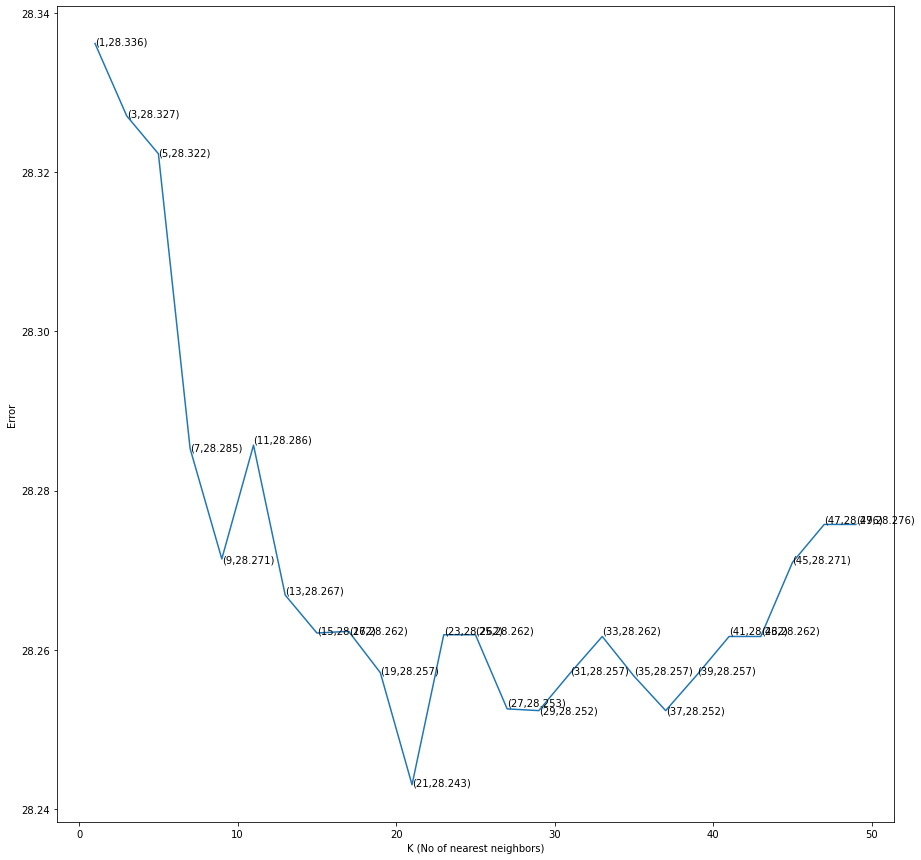

In [14]:
plt.figure(figsize=(15,15))
plt.plot(nbrs,MSE)

for xy in zip(nbrs,np.round(MSE,3)):
    plt.annotate('(%s,%s)' % xy, xy=xy, textcoords='data')

plt.xlabel("K (No of nearest neighbors)")
plt.ylabel("Error")
                 

## From above 10-fold cross val 
##### Best K = 21
##### Test Accuracy : 80% 
##### CV Accuracy : 70%